In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from bdshare import get_basic_hist_data
import yfinance as yf
from statsmodels.tsa.seasonal import STL
plt.style .use('fivethirtyeight')

In [2]:
ticker='ko'
df=yf.download(ticker,start='2012-01-01')
df.info()

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2715 entries, 2012-01-03 to 2022-10-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2715 non-null   float64
 1   High       2715 non-null   float64
 2   Low        2715 non-null   float64
 3   Close      2715 non-null   float64
 4   Adj Close  2715 non-null   float64
 5   Volume     2715 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 148.5 KB


In [3]:
df['adj']=(df.Open+df.Close)/2
df

,Open,High,Low,Close,Adj Close,Volume,adj
Date,,,,,,,
2012-01-03,35.075001,35.355000,35.049999,35.070000,25.078629,15639600,35.072500
2012-01-04,34.955002,35.035000,34.750000,34.849998,24.921309,14239200,34.902500
2012-01-05,34.880001,34.935001,34.674999,34.685001,24.803326,14287600,34.782501
2012-01-06,34.735001,34.814999,34.310001,34.465000,24.646000,13646600,34.600000
2012-01-09,34.500000,34.584999,34.400002,34.465000,24.646000,10522600,34.482500
...,...,...,...,...,...,...,...
2022-10-10,54.599998,54.959999,54.020000,54.389999,54.389999,10239100,54.494999
2022-10-11,54.459999,55.220001,54.240002,54.480000,54.480000,14303900,54.469999
2022-10-12,55.230000,56.040001,55.040001,55.139999,55.139999,18377400,55.184999


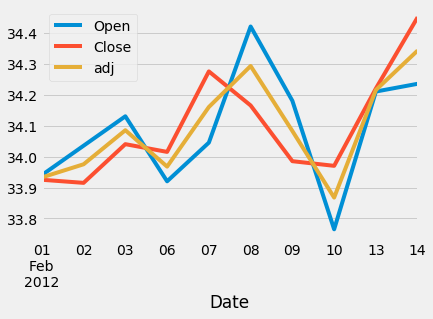

In [4]:
df[['Open','Close','adj']][20:30].plot()

In [5]:
df[1:12]

,Open,High,Low,Close,Adj Close,Volume,adj
Date,,,,,,,
2012-01-04,34.955002,35.035000,34.750000,34.849998,24.921309,14239200,34.902500
2012-01-05,34.880001,34.935001,34.674999,34.685001,24.803326,14287600,34.782501
2012-01-06,34.735001,34.814999,34.310001,34.465000,24.646000,13646600,34.600000
2012-01-09,34.500000,34.584999,34.400002,34.465000,24.646000,10522600,34.482500
2012-01-10,34.735001,34.759998,34.555000,34.669998,24.792593,12964400,34.702499
2012-01-11,34.185001,34.384998,33.775002,34.029999,24.334932,23428800,34.107500
2012-01-12,34.209999,34.250000,33.674999,33.785000,24.159727,15237000,33.997499
2012-01-13,33.669998,33.715000,33.285000,33.494999,23.952347,19991800,33.582499
2012-01-17,33.869999,33.939999,33.660000,33.674999,24.081068,15577000,33.772499


In [6]:
#df=df.interpolate(method='time')
df[1:12]

,Open,High,Low,Close,Adj Close,Volume,adj
Date,,,,,,,
2012-01-04,34.955002,35.035000,34.750000,34.849998,24.921309,14239200,34.902500
2012-01-05,34.880001,34.935001,34.674999,34.685001,24.803326,14287600,34.782501
2012-01-06,34.735001,34.814999,34.310001,34.465000,24.646000,13646600,34.600000
2012-01-09,34.500000,34.584999,34.400002,34.465000,24.646000,10522600,34.482500
2012-01-10,34.735001,34.759998,34.555000,34.669998,24.792593,12964400,34.702499
2012-01-11,34.185001,34.384998,33.775002,34.029999,24.334932,23428800,34.107500
2012-01-12,34.209999,34.250000,33.674999,33.785000,24.159727,15237000,33.997499
2012-01-13,33.669998,33.715000,33.285000,33.494999,23.952347,19991800,33.582499
2012-01-17,33.869999,33.939999,33.660000,33.674999,24.081068,15577000,33.772499


In [7]:
stl=STL(df['adj'],period=40)#two month seasonal Decomposition
Result = stl.fit()

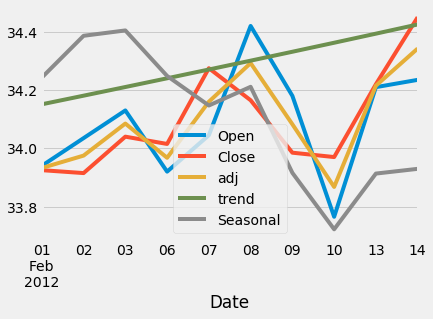

In [8]:
seasonal,trend,resid = Result.seasonal,Result.trend, Result.resid
df['trend']=trend
df['PCT_trend']=df.trend.pct_change()
df['Seasonal']=trend+seasonal
df[['Open','Close','adj','trend','Seasonal']][20:30].plot()

In [9]:
df['PCT_trend']

Date
2012-01-03         NaN
2012-01-04    0.000799
2012-01-05    0.000803
2012-01-06    0.000806
2012-01-09    0.000810
                ...   
2022-10-10   -0.002989
2022-10-11   -0.003011
2022-10-12   -0.003033
2022-10-13   -0.003055
2022-10-14   -0.003076
Name: PCT_trend, Length: 2715, dtype: float64

In [10]:
seasonal_median=seasonal.median()
lower=seasonal_median
upper=seasonal_median
upper

0.006027361205816557

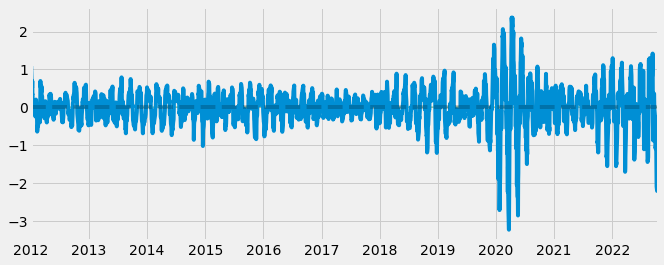

In [11]:
from datetime import datetime
plt.figure(figsize=(10,4))
plt.plot(seasonal)

plt.fill_between([datetime(2012,1,4), datetime(2022,10,14)], lower, upper, color='g', alpha=0.25, linestyle='--', linewidth=2)
plt.xlim(datetime(2012,1,4), datetime(2022,10,14))
plt.axhline(seasonal_median, color='k', linestyle='--', alpha=0.2,label='Valuation')

In [17]:
anomalies_Buy = df[(df.PCT_trend>0)&(df.adj<df.trend*0.97)|(df.trend*(1-abs(df.PCT_trend*20))>df.adj)]#df[(df.Seasonal<df.trend*0.99)&(seasonal < lower)&(df.adj<df.Seasonal)&(df.PCT_trend>0)|]
anomalies_Sell=df[(df.PCT_trend>0)&(df.adj>df.trend*1.03)|(df.trend*1.02<df.adj)]#df[(seasonal > upper)&(df.Seasonal>df.trend*1.01)&(df.adj>df.Seasonal)&(df.PCT_trend>0)|(df.trend*1.02<df.adj)]
anomalies_Buy

,Open,High,Low,Close,Adj Close,Volume,adj,trend,PCT_trend,Seasonal
Date,,,,,,,,,,
2012-05-21,37.105000,37.299999,37.064999,37.255001,26.836239,13488800,37.180000,37.669135,0.000476,37.452730
2012-05-22,37.290001,37.290001,36.955002,37.095001,26.720982,15260600,37.192501,37.687209,0.000480,37.471068
2012-05-23,37.000000,37.285000,36.910000,37.275002,26.850655,18000000,37.137501,37.705374,0.000482,37.378298
2012-05-31,37.480000,37.610001,37.330002,37.365002,26.915472,15147600,37.422501,37.794941,0.000464,37.916231
2012-06-01,36.994999,37.224998,36.505001,36.544998,26.324793,20843400,36.769999,37.812150,0.000455,37.858133
...,...,...,...,...,...,...,...,...,...,...
2022-07-14,61.330002,62.250000,61.299999,62.180000,61.729939,14433000,61.755001,62.695286,0.000647,63.181962
2022-07-20,62.400002,62.580002,61.150002,61.500000,61.054863,11010500,61.950001,62.860403,0.000647,61.754144
2022-07-21,61.259998,61.880001,60.790001,61.360001,60.915874,11959600,61.309999,62.899554,0.000623,61.882525


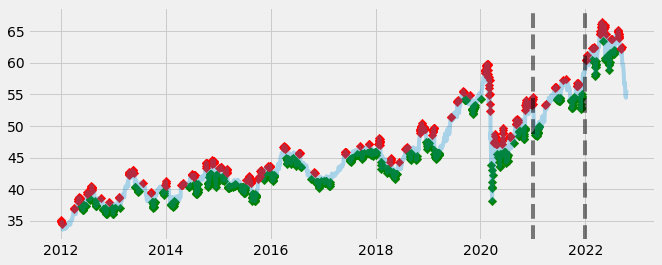

In [18]:
plt.figure(figsize=(10,4))
plt.plot(np.array(df.index),df['adj'].values,alpha=0.3)
for year in range(2020,2022):
    plt.axvline(datetime(year,12,31), color='k', linestyle='--', alpha=0.5)
    
plt.scatter(np.array(anomalies_Buy.index),anomalies_Buy['adj'].values, color='g', marker='D')
plt.scatter(np.array(anomalies_Sell.index),anomalies_Sell['adj'].values, color='R', marker='D')

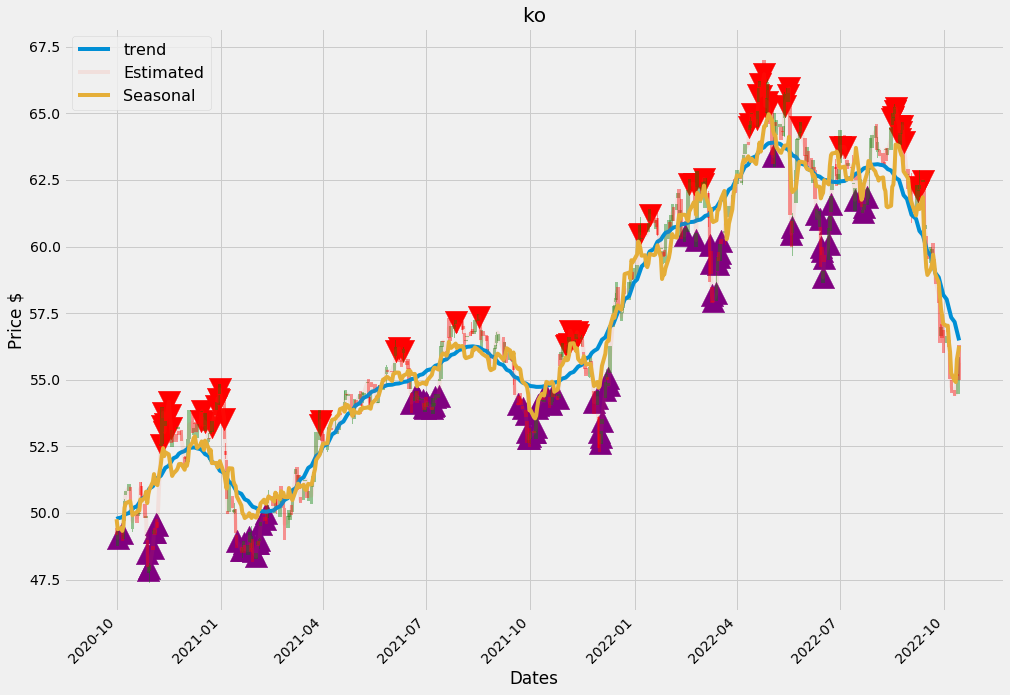

In [21]:
#create figure
x='2020-10-1'
y='2022-10-14'
plt.figure(figsize=(15,10))
df1=df.sort_index().loc[x:y]
anomalies_Buy1=anomalies_Buy.sort_index().loc[x:y]
anomalies_Sell1=anomalies_Sell.sort_index().loc[x:y]

#define width of candlestick elements
width = 3
width2 = 0.1

#define up and down prices
up = df1[df1.Close>=df1.Open]
down = df1[df1.Close<df1.Open]

#define colors to use
col1 = 'green'
col2 = 'red'

#plot up prices
plt.bar(up.index,up.Close-up.Open,width,bottom=up.Open,color=col1,alpha=0.4)
plt.bar(up.index,up.High-up.Close,width2,bottom=up.Close,color=col1,alpha=0.4)
plt.bar(up.index,up.Low-up.Open,width2,bottom=up.Open,color=col1,alpha=0.4)

#plot down prices
plt.bar(down.index,down.Close-down.Open,width,bottom=down.Open,color=col2,alpha=0.4)
plt.bar(down.index,down.High-down.Close,width2,bottom=down.Close,color=col2,alpha=0.4)
plt.bar(down.index,down.Low-down.Open,width2,bottom=down.Open,color=col2,alpha=0.4)

#
plt.plot(np.array(df1.index),df1.trend.values,label='trend')
plt.plot(np.array(df1.index),df1.adj.values,label='Estimated',alpha=0.1)
plt.plot(np.array(df1.index),df1.Seasonal.values,label='Seasonal')
#plt.plot(df1.First_dip_1, color='k', linestyle='--', alpha=0.2,label='First Dip M1')
#plt.plot(df1.First_dip_2, color='k', linestyle='--', alpha=0.2,label='Second Dip M2')

#rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')
plt.scatter(np.array(anomalies_Buy1.index),anomalies_Buy1['adj'].values, color='purple', marker='^',s=500)
plt.scatter(np.array(anomalies_Sell1.index),anomalies_Sell1['adj'].values, color='R', marker='v',s=500)
#display candlestick chart
plt.title(ticker)
plt.xlabel('Dates')
plt.ylabel('Price $')
plt.legend(fontsize=16)
plt.show()

In [15]:
trend

Date
2012-01-03    33.588759
2012-01-04    33.615596
2012-01-05    33.642573
2012-01-06    33.669692
2012-01-09    33.696955
                ...    
2022-10-10    57.169121
2022-10-11    56.996969
2022-10-12    56.824092
2022-10-13    56.650518
2022-10-14    56.476276
Name: trend, Length: 2715, dtype: float64

In [16]:
1-df['PCT_trend']*20

Date
2012-01-03         NaN
2012-01-04    0.984021
2012-01-05    0.983950
2012-01-06    0.983878
2012-01-09    0.983806
                ...   
2022-10-10    1.059783
2022-10-11    1.060225
2022-10-12    1.060662
2022-10-13    1.061092
2022-10-14    1.061515
Name: PCT_trend, Length: 2715, dtype: float64